In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math as m
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
le= LabelEncoder()
mmax= MinMaxScaler()
ohe = OneHotEncoder()
sc= StandardScaler()
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression,SGDRegressor
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
from sklearn.model_selection import KFold, cross_val_score

In [3]:
train = pd.read_csv(r"D:\Jupyter Notebook\datasets\CAPESTONE\healthcare\train_data.csv")
test = pd.read_csv(r"D:\Jupyter Notebook\datasets\CAPESTONE\healthcare\test_data.csv")

In [4]:
df = pd.concat([train,test],ignore_index=True)

In [5]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455490,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN
455491,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN
455492,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN
455493,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN


In [6]:
df.drop('case_id',axis=1,inplace=True)

In [7]:
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455490,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN
455491,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN
455492,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN
455493,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN


In [8]:
df['Bed Grade'].unique()

array([ 2.,  3.,  4.,  1., nan])

In [9]:
df.shape

(455495, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455495 entries, 0 to 455494
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      455495 non-null  int64  
 1   Hospital_type_code                 455495 non-null  object 
 2   City_Code_Hospital                 455495 non-null  int64  
 3   Hospital_region_code               455495 non-null  object 
 4   Available Extra Rooms in Hospital  455495 non-null  int64  
 5   Department                         455495 non-null  object 
 6   Ward_Type                          455495 non-null  object 
 7   Ward_Facility_Code                 455495 non-null  object 
 8   Bed Grade                          455347 non-null  float64
 9   patientid                          455495 non-null  int64  
 10  City_Code_Patient                  448806 non-null  float64
 11  Type of Admission                  4554

In [11]:
df.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,455495.000000,455495.000000,455495.000000,455347.000000,455495.000000,448806.000000,455495.000000,455495.000000
mean,18.326335,4.767798,3.196140,2.628420,65786.793563,7.249495,3.284229,4877.434022
std,8.634036,3.102450,1.166994,0.871997,37968.830850,4.758941,1.768044,1084.982089
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,11.000000,2.000000,2.000000,2.000000,32874.000000,4.000000,2.000000,4184.000000
50%,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4738.000000
75%,26.000000,7.000000,4.000000,3.000000,98576.500000,8.000000,4.000000,5405.000000
max,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11920.000000


In [12]:
df.dtypes

Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [13]:
df.isnull().sum()

Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [14]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


# UNIVARIATE ANALYSIS

In [15]:
df['Visitors with Patient'].unique()

array([ 2,  4,  3,  8,  6,  7, 13,  5,  1, 10, 15, 11, 12,  9, 24, 16, 14,
       20,  0, 19, 18, 17, 23, 21, 32, 30, 22, 25, 29], dtype=int64)

In [16]:
df.drop('patientid',axis=1,inplace=True)

In [17]:
numcols= ['City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit', 'Available Extra Rooms in Hospital']

In [18]:
catcols = ['Hospital_code','Bed Grade','City_Code_Hospital','Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type','Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age','Stay']

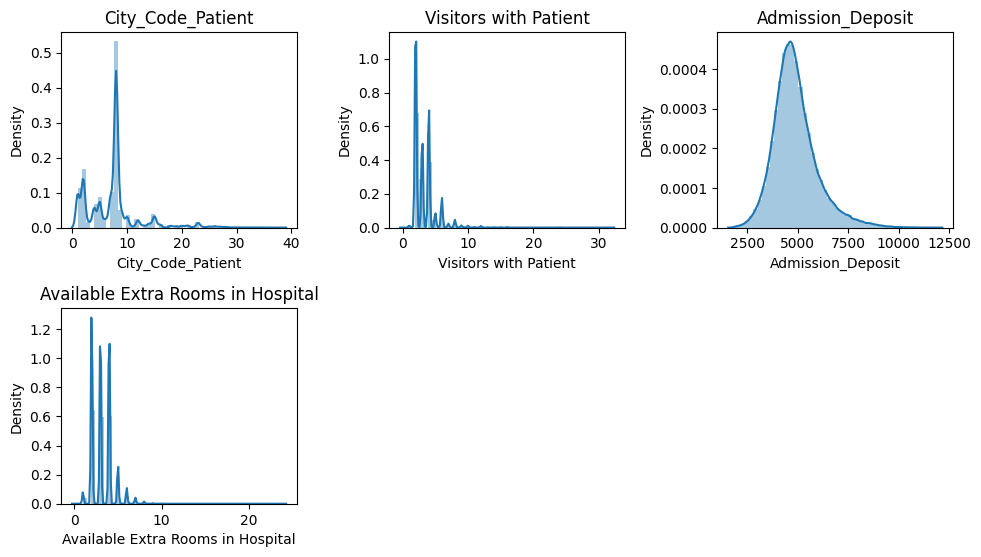

In [19]:
# NUMCOLS

rep=1
nrows=3
ncols=3

plt.figure(figsize=(10,8))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(df.loc[:,i])
    plt.title(i)
    rep+=1
    
plt.tight_layout()
plt.show()

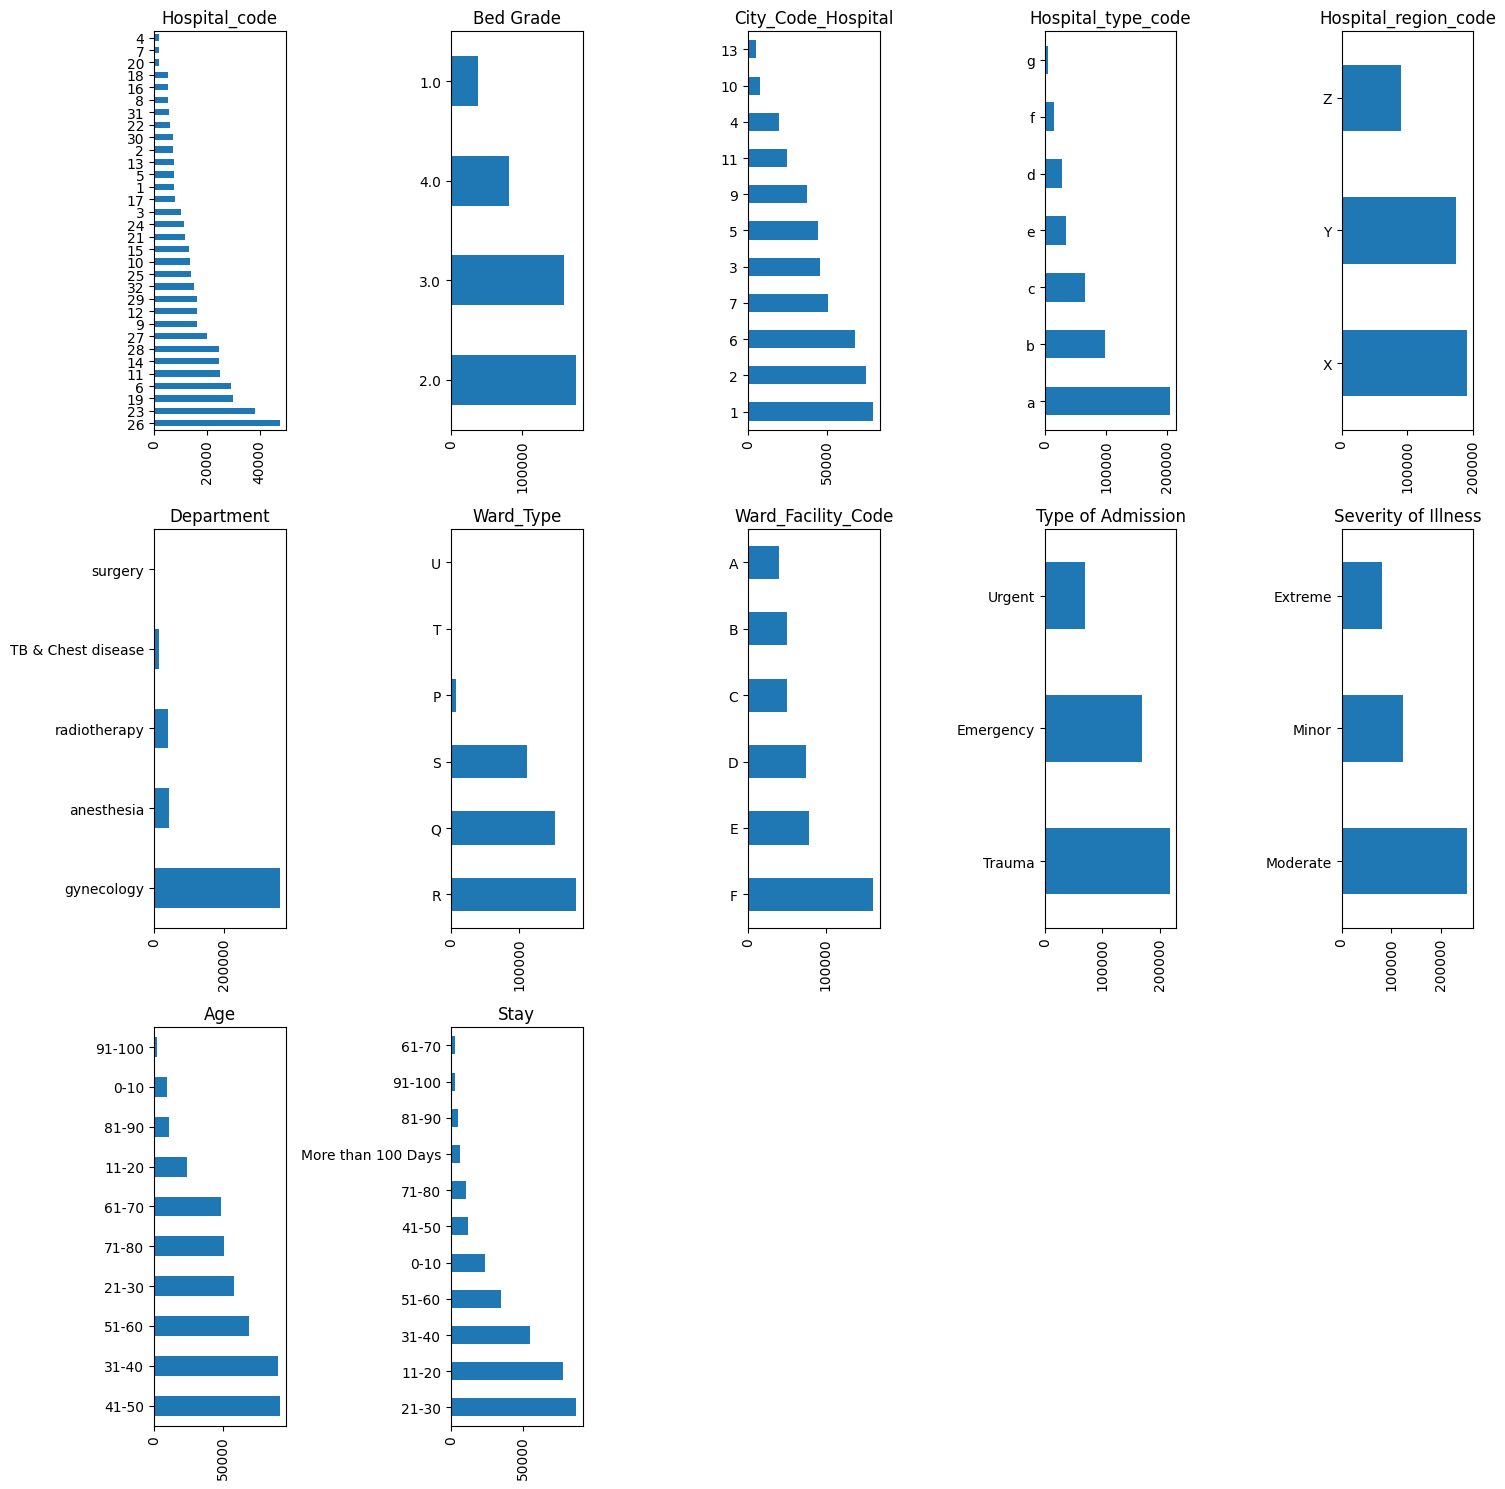

In [20]:
# CAT COLS

nrows=3
ncols=5
rep=1

plt.figure(figsize=(15,15))
for i in catcols:
    plt.subplot(nrows,ncols,rep)
    df.loc[:,i].value_counts().plot(kind='barh')
    plt.xticks(rotation=90)
    plt.title(i)
    rep+=1
    
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Stay')

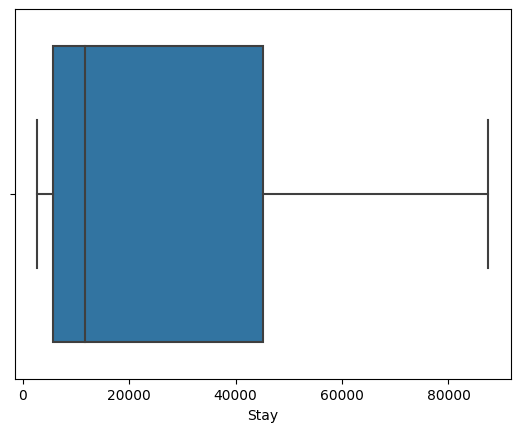

In [21]:
sns.boxplot(data=df, x= df.Stay.value_counts())
plt.xlabel('Stay')

# BIVARIATE ANALYSIS

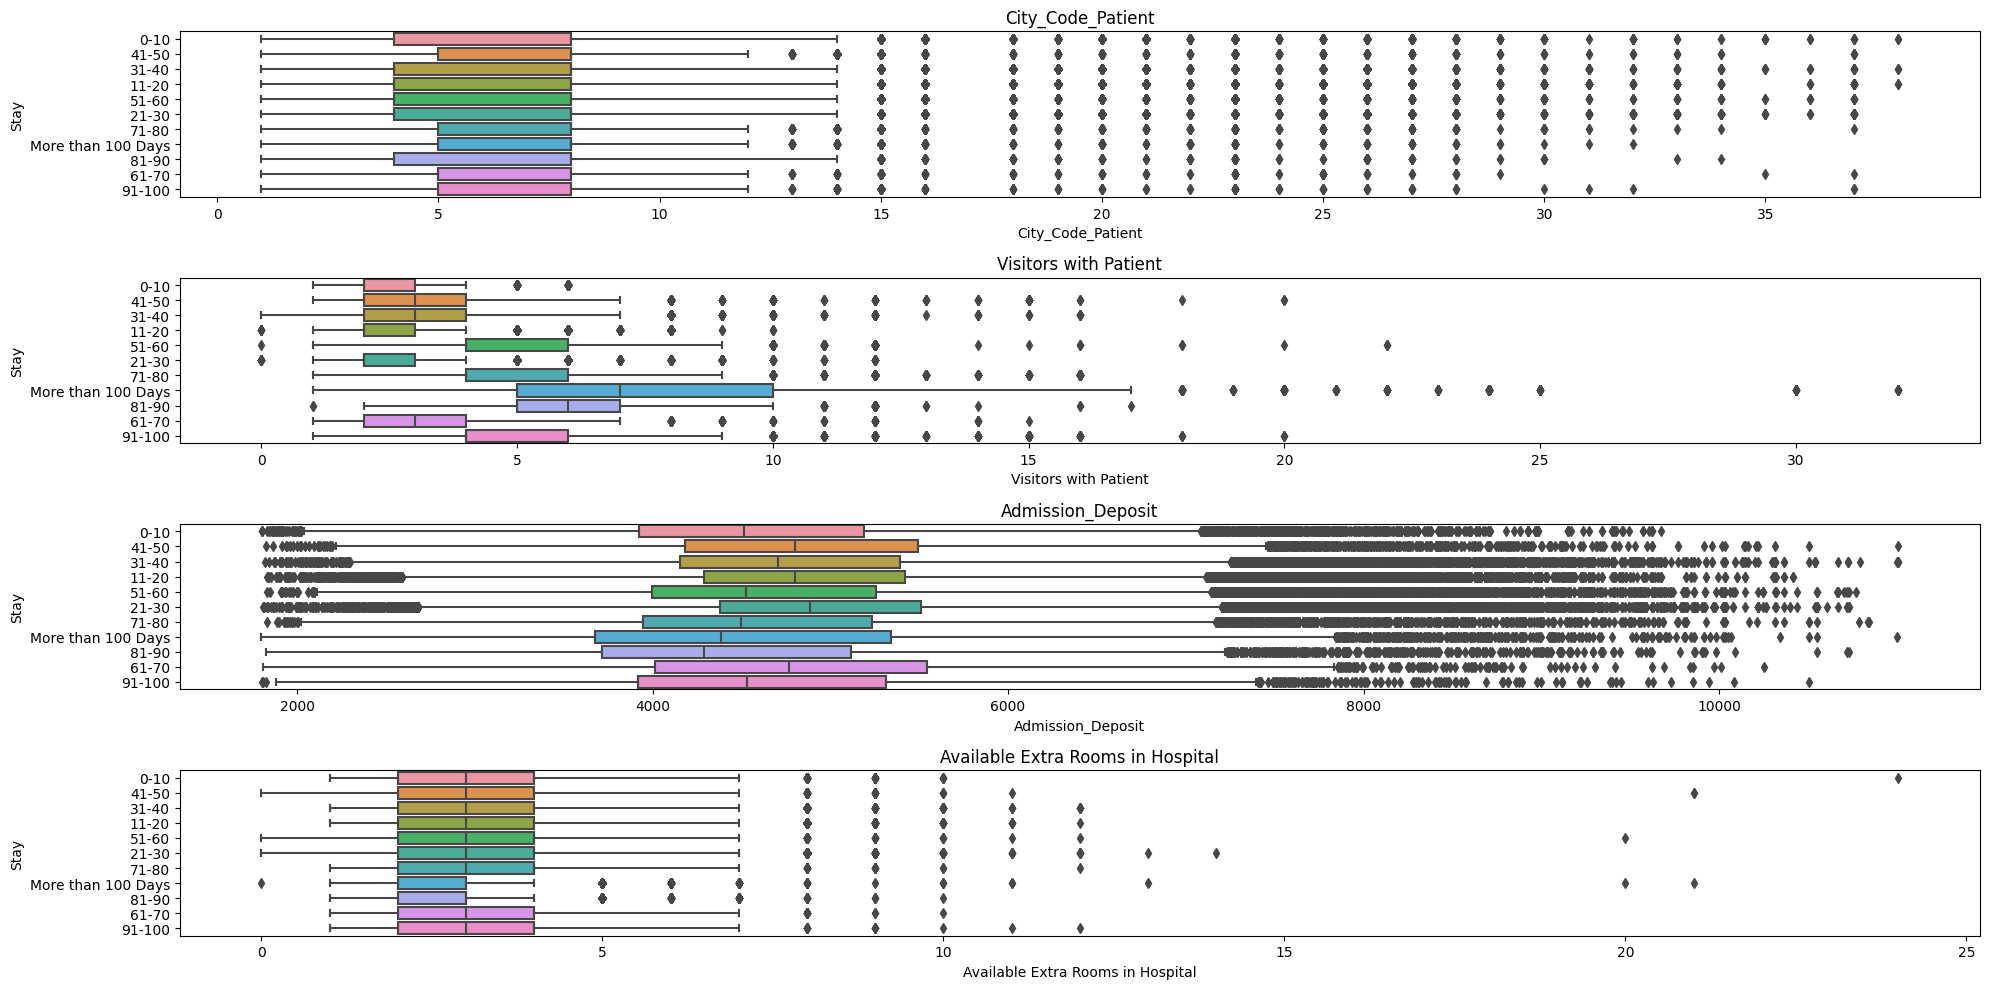

In [22]:
# Num Cols


nrows=4
ncols=1
rep=1

plt.figure(figsize=(20,10))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(data=df, y=df.Stay, x=i)
    plt.title(i)
    rep+=1
    
plt.tight_layout()
plt.show()

<Axes: >

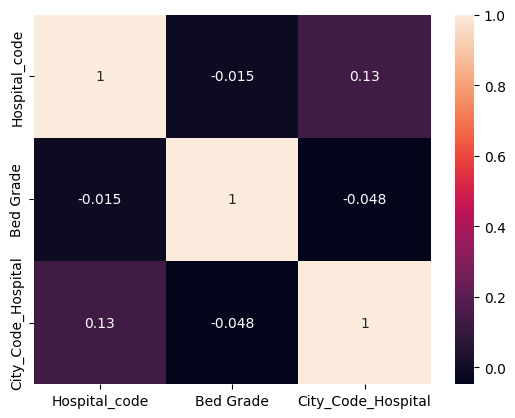

In [23]:
#CATCOLS

sns.heatmap(df.loc[:,catcols].corr(),annot=True)

<Axes: >

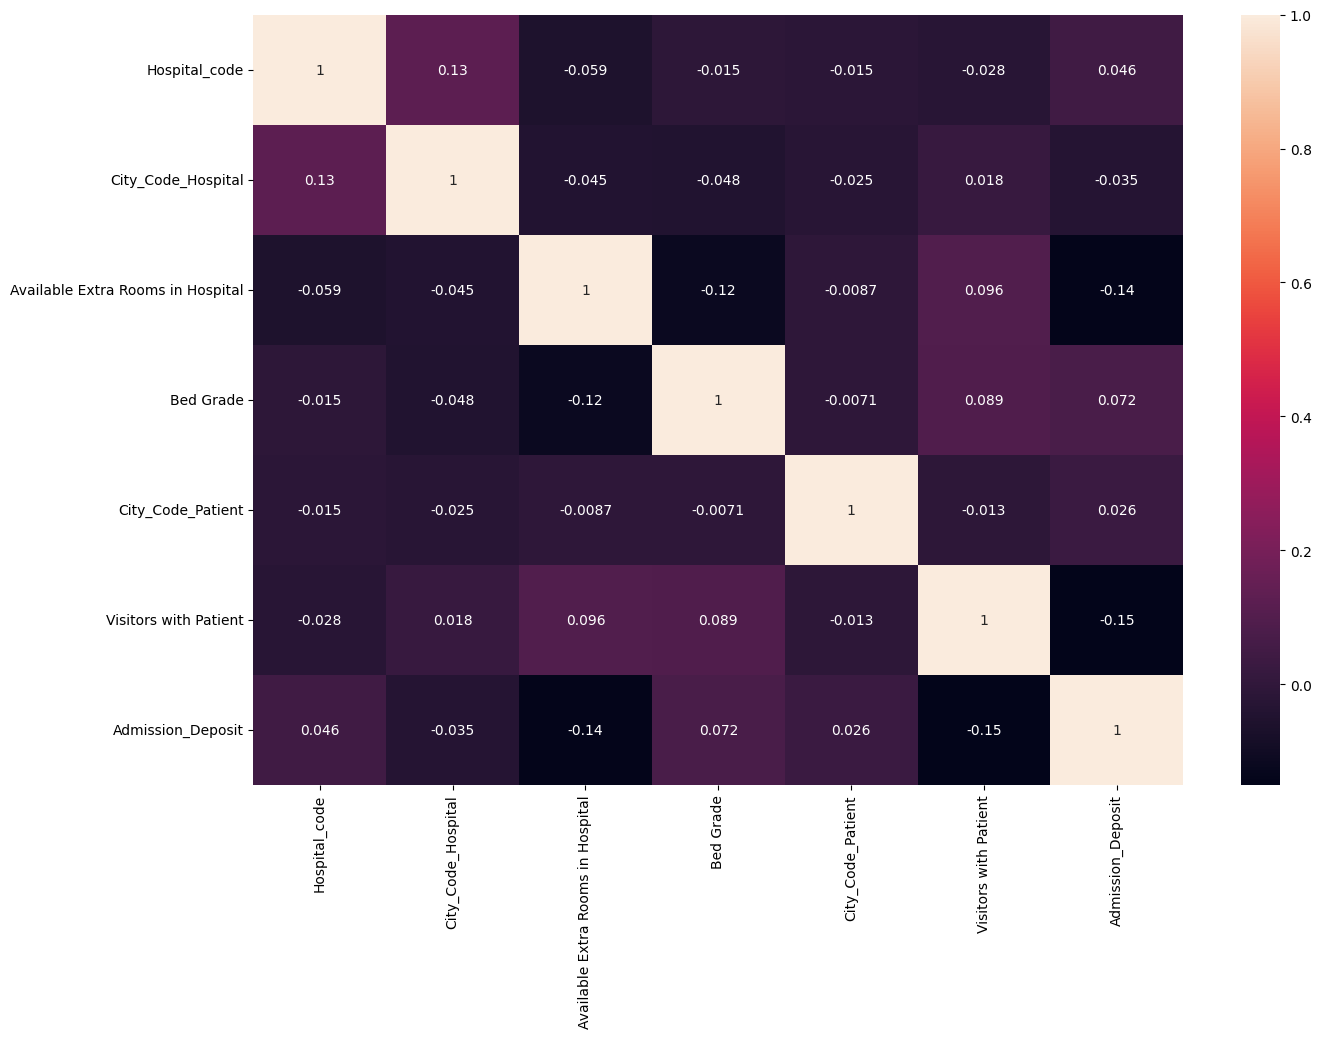

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [25]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [26]:
# NULL VALUE REMOVAL

In [27]:
df.isnull().sum()

Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
nulval = ['Bed Grade','City_Code_Patient','Stay']

In [30]:
si = SimpleImputer(strategy='most_frequent')

In [31]:
for col in nulval:
    df[col] = si.fit_transform(df[col].values.reshape(-1, 1))

In [32]:
df.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [33]:
for i in catcols:
    df[i] = le.fit_transform(df[i])

In [34]:
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,7,2,2,2,3,3,2,5,1,7.0,0,0,2,5,4911.0,0
1,1,2,4,2,2,3,3,5,1,7.0,1,0,2,5,5954.0,4
2,9,4,0,0,2,1,3,4,1,7.0,1,0,2,5,4745.0,3
3,25,1,1,1,2,3,2,3,1,7.0,1,0,2,5,7272.0,4
4,25,1,1,1,2,3,3,3,1,7.0,1,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455490,10,1,1,1,4,1,1,3,2,3.0,0,1,4,4,6313.0,2
455491,24,4,0,0,2,3,2,4,3,7.0,0,2,2,0,3510.0,2
455492,29,2,2,2,2,1,2,0,3,12.0,2,1,2,0,7190.0,2
455493,4,0,0,0,2,1,2,4,3,10.0,1,1,2,4,5435.0,2


In [35]:
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,7,2,2,2,3,3,2,5,1,7.0,0,0,2,5,4911.0,0
1,1,2,4,2,2,3,3,5,1,7.0,1,0,2,5,5954.0,4
2,9,4,0,0,2,1,3,4,1,7.0,1,0,2,5,4745.0,3
3,25,1,1,1,2,3,2,3,1,7.0,1,0,2,5,7272.0,4
4,25,1,1,1,2,3,3,3,1,7.0,1,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455490,10,1,1,1,4,1,1,3,2,3.0,0,1,4,4,6313.0,2
455491,24,4,0,0,2,3,2,4,3,7.0,0,2,2,0,3510.0,2
455492,29,2,2,2,2,1,2,0,3,12.0,2,1,2,0,7190.0,2
455493,4,0,0,0,2,1,2,4,3,10.0,1,1,2,4,5435.0,2


In [36]:
df.std()

Hospital_code                           8.634036
Hospital_type_code                      1.532773
City_Code_Hospital                      2.806344
Hospital_region_code                    0.753238
Available Extra Rooms in Hospital       1.166994
Department                              0.561536
Ward_Type                               0.804688
Ward_Facility_Code                      1.689726
Bed Grade                               0.871929
City_Code_Patient                       4.724731
Type of Admission                       0.689184
Severity of Illness                     0.768535
Visitors with Patient                   1.768044
Age                                     1.889698
Admission_Deposit                    1084.982089
Stay                                    1.826055
dtype: float64

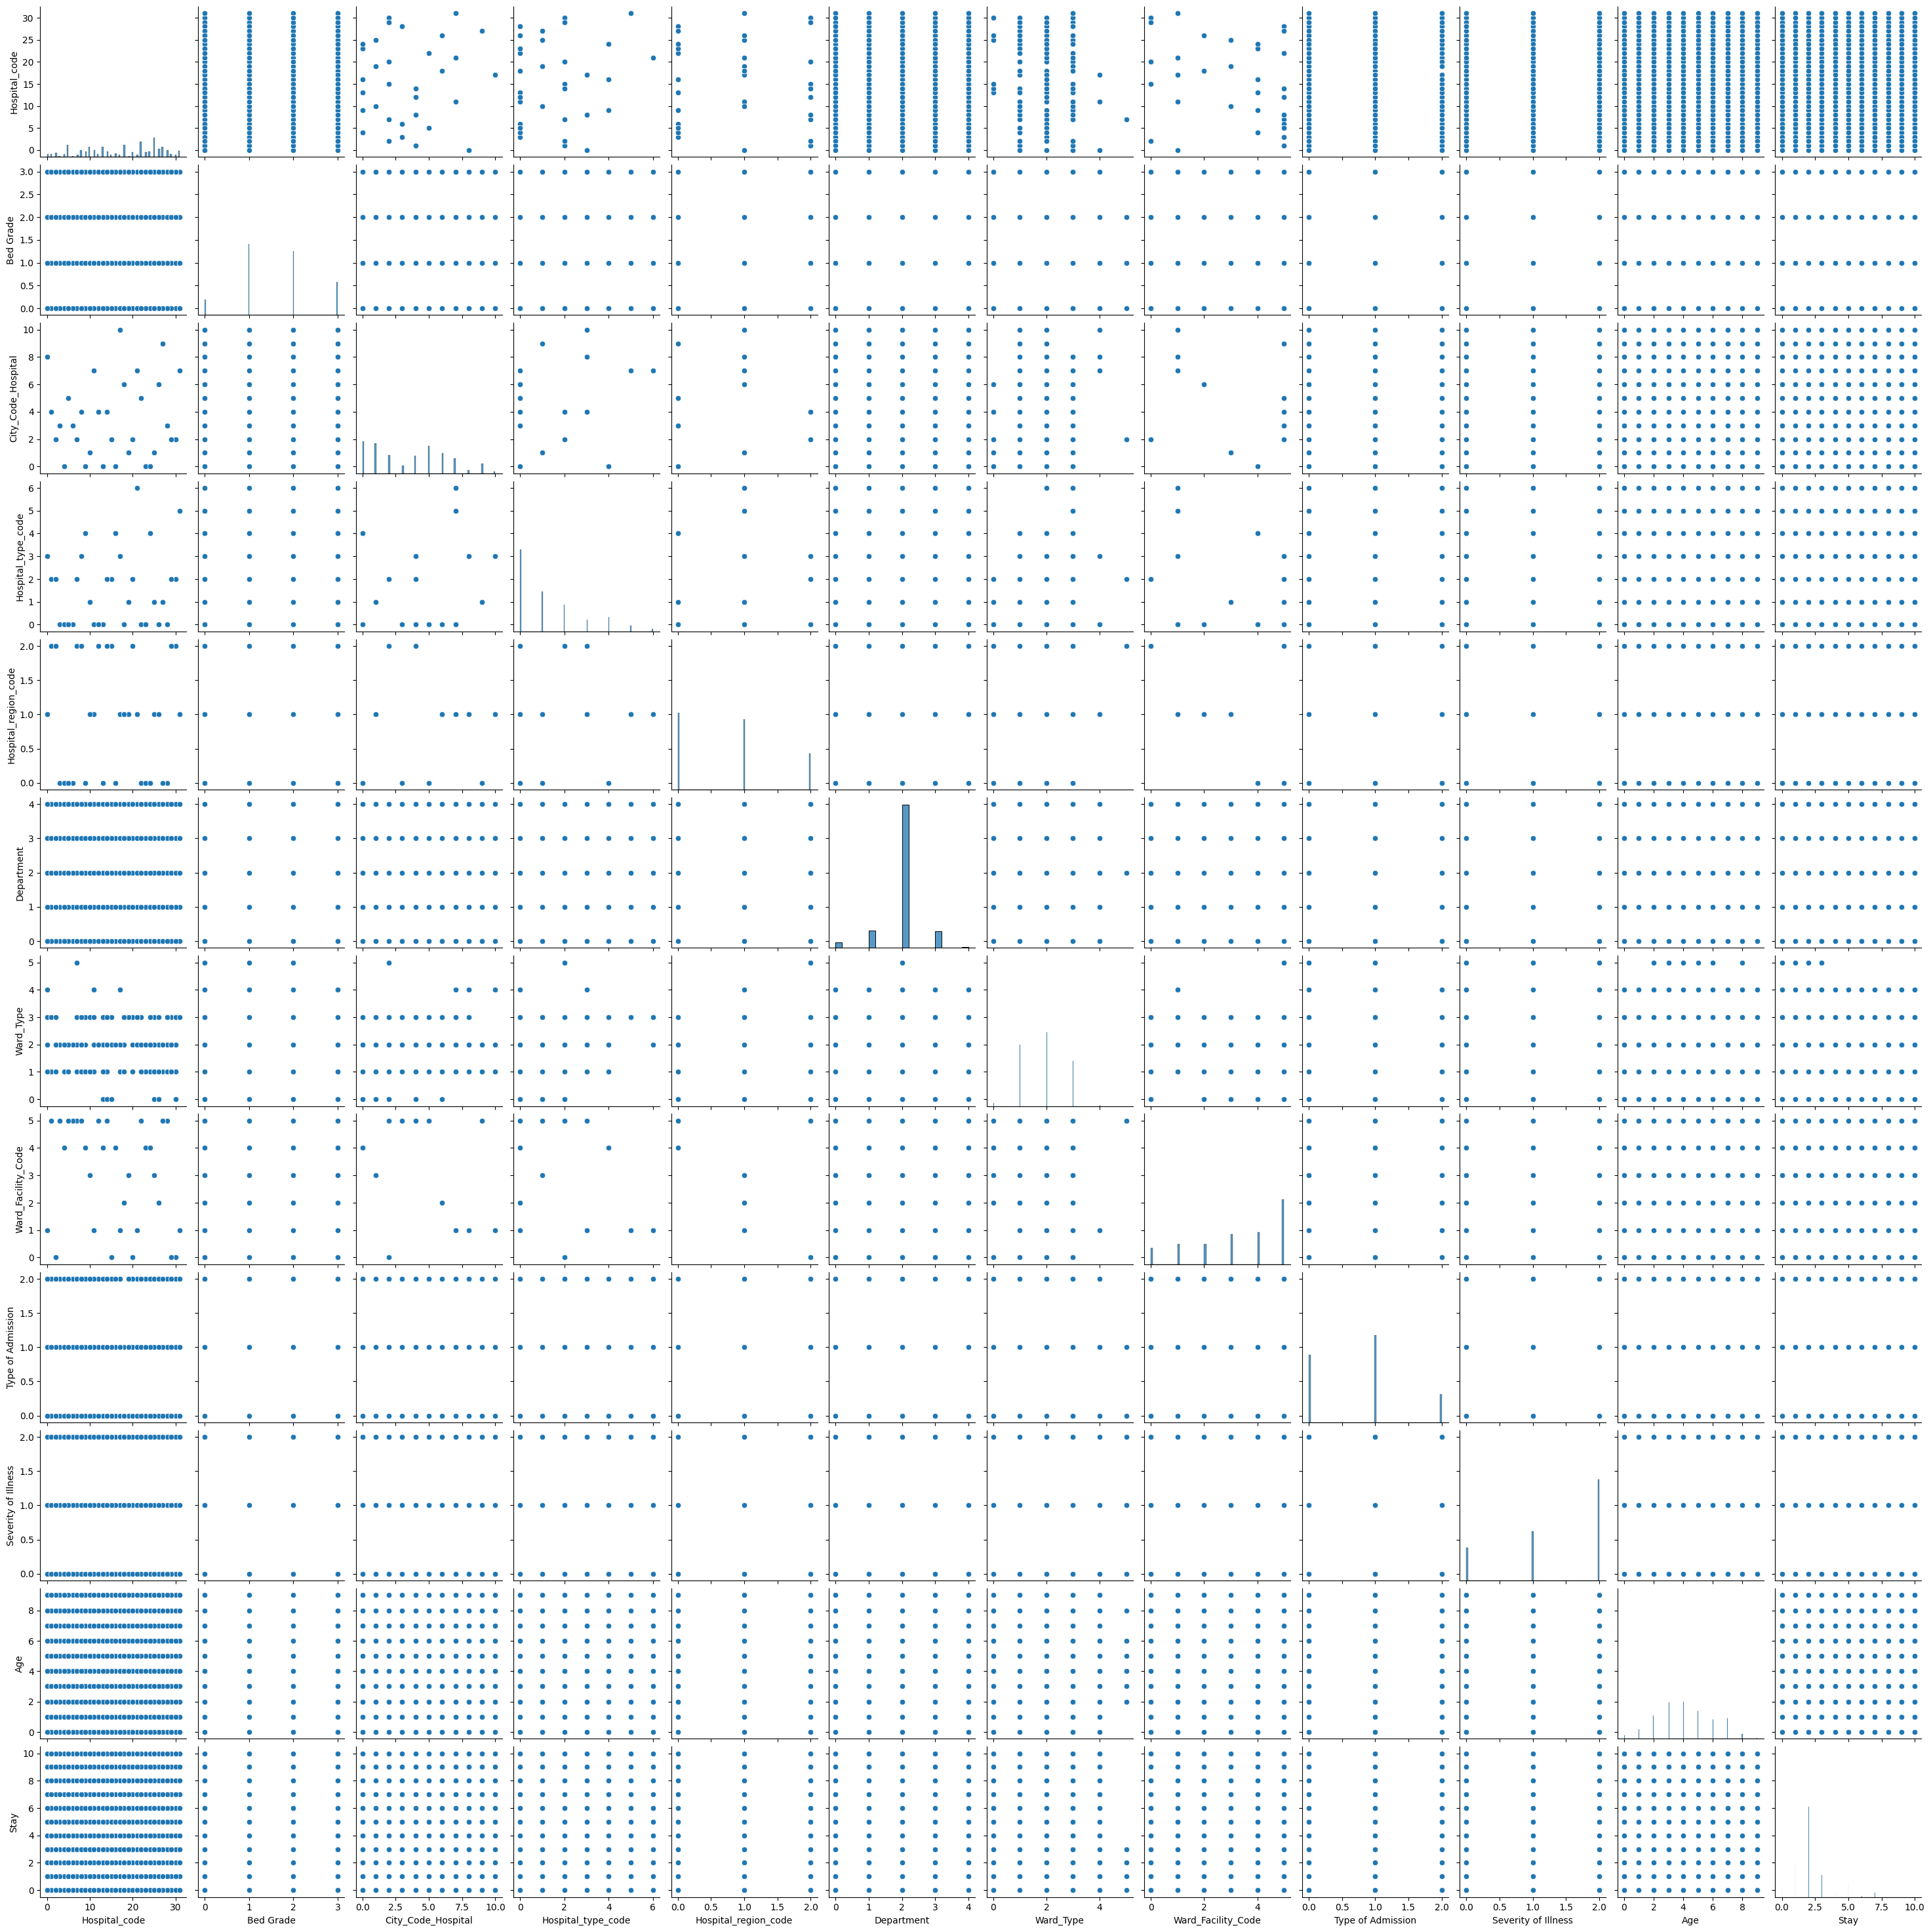

In [37]:
sns.pairplot(df.loc[:,catcols])

In [38]:
df1 = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [39]:
df1.std()

Hospital_code                        1.000001
Hospital_type_code                   1.000001
City_Code_Hospital                   1.000001
Hospital_region_code                 1.000001
Available Extra Rooms in Hospital    1.000001
Department                           1.000001
Ward_Type                            1.000001
Ward_Facility_Code                   1.000001
Bed Grade                            1.000001
City_Code_Patient                    1.000001
Type of Admission                    1.000001
Severity of Illness                  1.000001
Visitors with Patient                1.000001
Age                                  1.000001
Admission_Deposit                    1.000001
Stay                                 1.000001
dtype: float64

In [40]:
#Visualising the data

In [41]:
df_og = pd.concat([train,test],ignore_index=True)

In [42]:
df_og.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [43]:
for col in nulval:
    df_og[col] = si.fit_transform(df_og[col].values.reshape(-1, 1))

In [44]:
df_og.drop('case_id',axis=1,inplace=True)

In [45]:
df_og.drop('patientid',axis=1,inplace=True)

In [46]:
df_og.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


# Visualising the data

Text(0.5, 1.0, 'Top 5 Hospital Types')

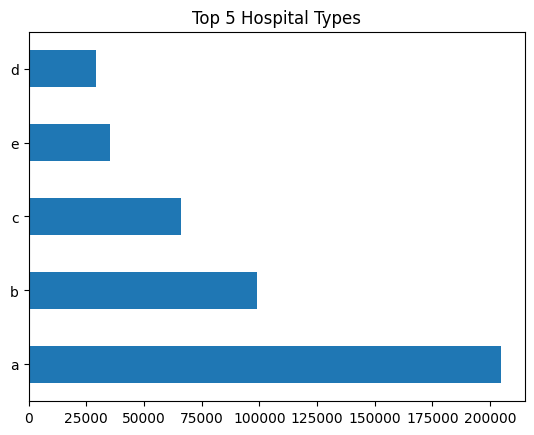

In [66]:
df_og.loc[:,'Hospital_type_code'].value_counts().head(5).plot(kind='barh')
plt.title('Top 5 Hospital Types')

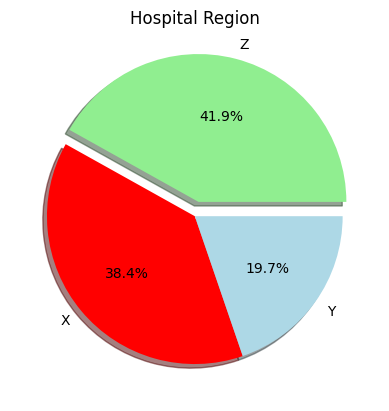

In [49]:
plt.pie(df_og.Hospital_region_code.value_counts(),labels=['Z', 'X', 'Y'],shadow=True,autopct='%1.1f%%'
       ,explode=(0.1, 0, 0),colors=['lightgreen','red','lightblue'])
plt.title('Hospital Region')
plt.show()

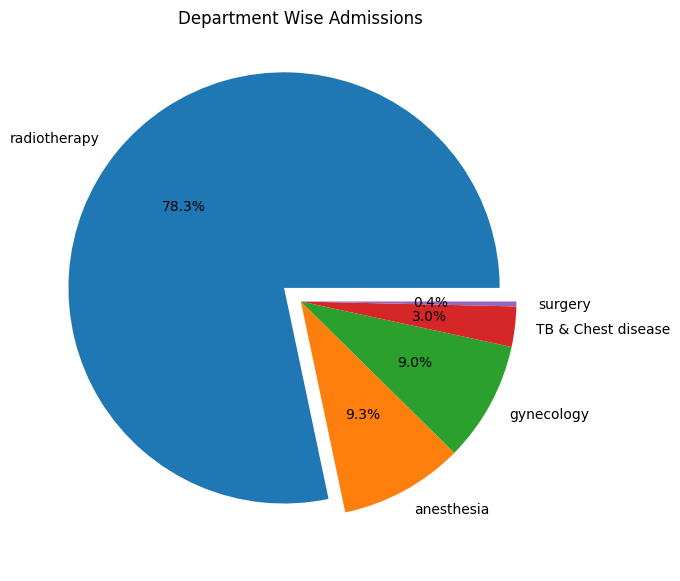

In [50]:
plt.figure(figsize=(7,7))
plt.pie(df_og.Department.value_counts(),shadow=False,autopct='%1.1f%%',labels=df_og.Department.unique()
       ,explode=(0.1,0,0,0,0),counterclock=True)
plt.title('Department Wise Admissions')
plt.show()

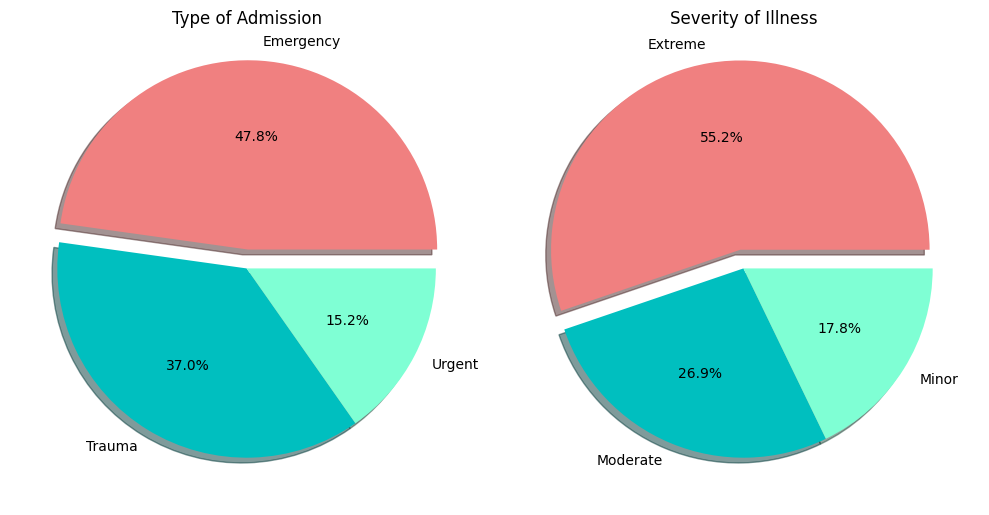

In [65]:
x1= ['Type of Admission','Severity of Illness']
rep=1
nrows=1
ncols=2

plt.figure(figsize=(10,10))
for i in x1:
    plt.subplot(nrows,ncols,rep)
    plt.pie(df_og[i].value_counts(),shadow=True,autopct='%1.1f%%',
        labels=df_og[i].unique(),explode=(0.1,0,0),counterclock=True,colors=['lightcoral','c','aquamarine'])
    plt.title(i)
    rep+=1
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Amount Deposited by Patients')

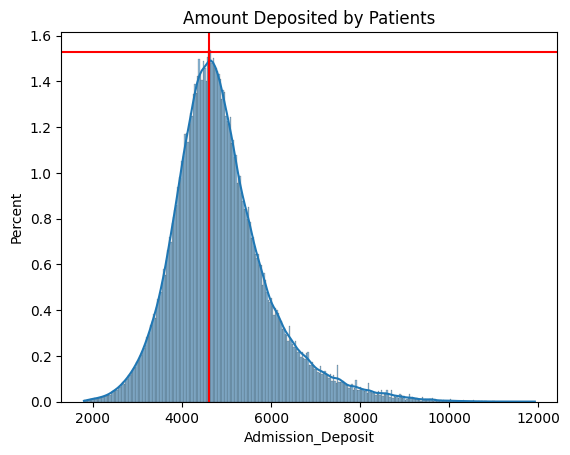

In [92]:
sns.histplot(df_og.Admission_Deposit,kde=True,stat='percent')
plt.axhline(y=1.53,color='red')
plt.axvline(x=4600,color='red')
plt.title('Amount Deposited by Patients')

In [94]:
df_og.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [142]:
df_og = df_og.rename(columns={'Bed Grade': 'Bed_Grade'})

In [123]:
import sqlite3

In [124]:
conn = sqlite3.connect('mydatabase.db')

In [125]:
cursor = conn.cursor()

In [144]:
df_og.to_sql('mytable', conn, if_exists='replace', index=False)

455495

In [ ]:
#SFW GHOL

In [156]:
a=[]
b=[]
c=[]
cursor = conn.cursor()

cursor.execute('SELECT Ward_Type, Bed_Grade, COUNT(*) AS Bed_Grade_Count FROM mytable GROUP BY Ward_Type, Bed_Grade ORDER BY Ward_Type, Bed_Grade')
data = cursor.fetchall()

for row in data:
    a.append(row[0])
    b.append(row[1])
    c.append(row[2])

In [157]:
df_sql=pd.DataFrame({'Ward_Type':a,'Bed_Grade':b,'Count':c})
df_sql

,Ward_Type,Bed_Grade,Count
0,P,1.0,528
1,P,2.0,2465
2,P,3.0,2697
3,P,4.0,1509
4,Q,1.0,13609
5,Q,2.0,57996
6,Q,3.0,52555
7,Q,4.0,27886
8,R,1.0,13546
9,R,2.0,70541


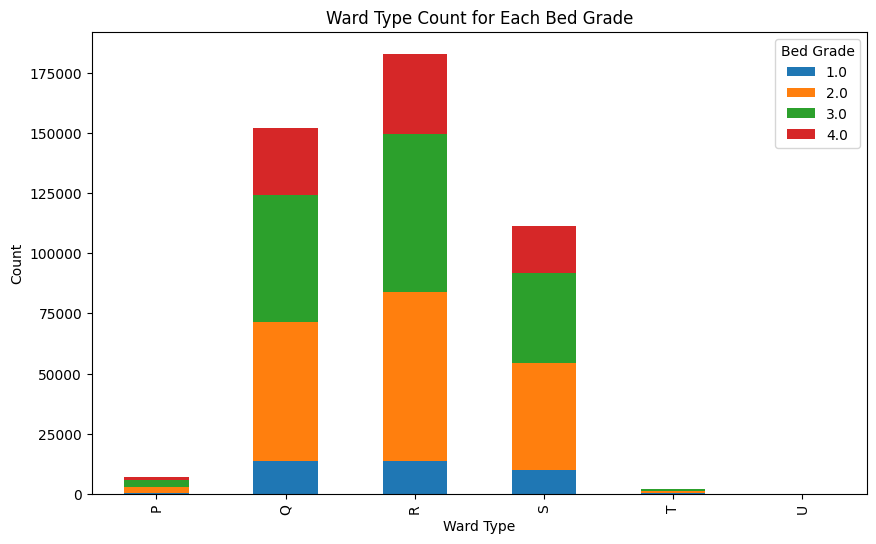

In [161]:
pivot_df = df_sql.pivot(index='Ward_Type', columns='Bed_Grade', values='Count')

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Ward Type')
plt.ylabel('Count')
plt.title('Ward Type Count for Each Bed Grade')
plt.legend(title='Bed Grade', loc='upper right')
plt.show()

Text(0.5, 1.0, 'Visitors with Patients')

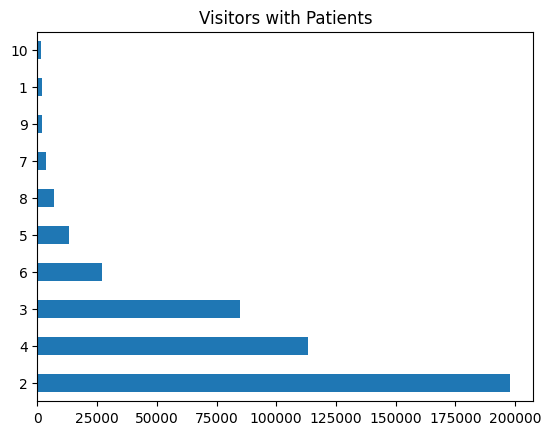

In [186]:
df_og['Visitors with Patient'].value_counts().head(10).plot(kind='barh')
plt.title('Visitors with Patients')